# COVID Analysis


### The Data
   * COVID case data compiled by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University and stored [here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data#usa-daily-state-reports-csse_covid_19_daily_reports_us)
   * Census population data from [Kaggle](https://www.kaggle.com/peretzcohen/2019-census-us-population-data-by-state), for scaling case numbers 
   * CDC Vaccine Data (processed in `vaccine_data_processing.ipynb`)
   * NOAA Weather Data (processed in `weather_data_processing.ipynb`)
 
#### Data Processing 

The data sets have already been cleaned and processing for key features and saved to the `data/` folder. 

### Goal/Modeling 


## Loading and Combining Data

In [289]:
# data handling
import pandas as pd
import numpy as np

# seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [290]:
covid_data = pd.read_csv('../data/processed_us_daily_reports.csv', index_col=0)
hist_weather_data = pd.read_csv('../data/historical_monthly_temp_avgs_by_state.csv', index_col=0)
all_weather = pd.read_csv('../data/all_weather_data.csv', index_col=0)
monthly_weather_data = pd.read_csv('../data/monthly_temps_by_state.csv', index_col=0)
vaccine_data = pd.read_csv('../data/vaccine_data.csv', index_col=0)

In [291]:
covid_data.loc[:,'Date'] = pd.to_datetime(covid_data['Date'])
covid_data.head()

,Date,State,Total Pop,Confirmed_diff,Confirmed_rate,Confirmed_rate_diff,Deaths_diff,Deaths_rate,Deaths_rate_diff,Recovered_rate,Recovered_diff,Recovered_rate_diff,Active_diff,Active_rate_diff,Active_rate,Case_Fatality_Ratio
0,2020-04-12,Alabama,4903185,NaN,0.000748,NaN,NaN,0.000019,NaN,NaN,NaN,NaN,NaN,NaN,0.000708,2.610160
1,2020-04-13,Alabama,4903185,203.0,0.000789,0.000041,6.0,0.000020,1.223694e-06,NaN,NaN,NaN,165.0,0.000034,0.000741,2.651312
2,2020-04-14,Alabama,4903185,171.0,0.000824,0.000035,15.0,0.000023,3.059236e-06,NaN,NaN,NaN,204.0,0.000042,0.000783,2.883886
3,2020-04-15,Alabama,4903185,266.0,0.000878,0.000054,4.0,0.000024,8.157963e-07,NaN,NaN,NaN,118.0,0.000024,0.000807,2.895706
4,2020-04-16,Alabama,4903185,158.0,0.000911,0.000032,15.0,0.000027,3.059236e-06,NaN,NaN,NaN,255.0,0.000052,0.000859,3.060990


In [292]:
#format for the dates
covid_data['Date'].head()

0   2020-04-12
1   2020-04-13
2   2020-04-14
3   2020-04-15
4   2020-04-16
Name: Date, dtype: datetime64[ns]

In [293]:
all_weather.head(13)

,State,Year,Month,Monthly Temp (F),Monthly Avg Temp (F)
0,Alabama,2020,1,49.2250,44.468750
1,Alabama,2021,1,46.1375,44.468750
2,Alabama,2020,2,50.4875,48.623750
3,Alabama,2021,2,46.1500,48.623750
4,Alabama,2020,3,62.8875,55.858750
5,Alabama,2021,3,59.0750,55.858750
6,Alabama,2020,4,61.5500,63.096875
7,Alabama,2021,4,61.2375,63.096875
8,Alabama,2020,5,68.5625,71.006875
9,Alabama,2021,5,69.0750,71.006875


In [294]:
contiguous_US = ['Michigan','Wyoming','Maryland','Massachusetts','Rhode Island','Oregon',
                 'Pennsylvania','West Virginia','District of Columbia','Maine','Indiana',
                 'Nevada','Georgia','New Mexico','Colorado','Virginia','Kentucky','Minnesota',
                 'Arkansas','Connecticut','North Carolina','Montana','Oklahoma','Louisiana',
                 'Nebraska','Alabama','Florida','North Dakota','Delaware','Vermont','Idaho',
                 'Kansas','Wisconsin','New Jersey','Iowa','Missouri','New York','Utah',
                 'Washington','Arizona','Tennessee','Ohio','Texas','Mississippi','South Carolina',
                 'California','New Hampshire','South Dakota','Illinois']
states_only = list(set(contiguous_US)-set(['Disstrict of Columbia']))

In [295]:
def plot_states_over_time(data, state_names, feature_col, time_col="Date"):
    for state in state_names:
        state_data = data[data['State']==state]
        sns.lineplot(data=state_data, x=time_col, y=feature_col);
    return plt.legend(labels=state_names);

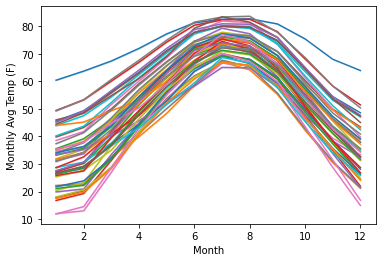

In [296]:
ax = plot_states_over_time(all_weather, states_only, 'Monthly Avg Temp (F)', time_col="Month")
ax.remove()

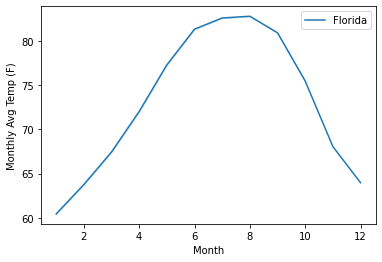

In [297]:
ax = plot_states_over_time(all_weather, ['Florida'], 'Monthly Avg Temp (F)', time_col="Month")

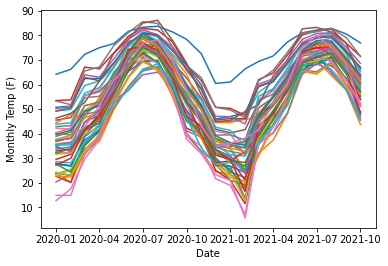

In [298]:
all_weather['Date'] = pd.to_datetime(all_weather['Year'].astype(str) + all_weather['Month'].astype(str), format='%Y%m')
all_weather.head()
ax = plot_states_over_time(all_weather, states_only, 'Monthly Temp (F)', time_col="Date")
ax.remove()

In [299]:
vaccine_data.loc[:,'Date'] = pd.to_datetime(vaccine_data['Date'])
vaccine_data.head()

,Date,State,Administered,Series_Complete_Yes
0,2021-11-18,Wisconsin,7894520,3440272
1,2021-11-18,Maine,2138582,964009
2,2021-11-18,Tennessee,7940729,3355930
5,2021-11-18,District of Columbia,1132019,449491
6,2021-11-18,South Carolina,6020753,2621180


In [300]:
vaccine_data['Date'].head()

0   2021-11-18
1   2021-11-18
2   2021-11-18
5   2021-11-18
6   2021-11-18
Name: Date, dtype: datetime64[ns]

Merge weather data first 

In [306]:
combined_covid_data = covid_data.merge(vaccine_data, how="left", 
                                   left_on=['Date','State'], right_on=['Date','State'])
combined_covid_data.loc[:,['Administered','Series_Complete_Yes']] = combined_covid_data[['Administered','Series_Complete_Yes']].fillna(0)
combined_covid_data['Month'] = combined_covid_data['Date'].dt.month
combined_covid_data['Year'] = combined_covid_data['Date'].dt.year
combined_covid_data.head(10)

,Date,State,Total Pop,Confirmed_diff,Confirmed_rate,Confirmed_rate_diff,Deaths_diff,Deaths_rate,Deaths_rate_diff,Recovered_rate,Recovered_diff,Recovered_rate_diff,Active_diff,Active_rate_diff,Active_rate,Case_Fatality_Ratio,Administered,Series_Complete_Yes,Month,Year
0,2020-04-12,Alabama,4903185,NaN,0.000748,NaN,NaN,0.000019,NaN,NaN,NaN,NaN,NaN,NaN,0.000708,2.610160,0.0,0.0,4,2020
1,2020-04-13,Alabama,4903185,203.0,0.000789,0.000041,6.0,0.000020,1.223694e-06,NaN,NaN,NaN,165.0,0.000034,0.000741,2.651312,0.0,0.0,4,2020
2,2020-04-14,Alabama,4903185,171.0,0.000824,0.000035,15.0,0.000023,3.059236e-06,NaN,NaN,NaN,204.0,0.000042,0.000783,2.883886,0.0,0.0,4,2020
3,2020-04-15,Alabama,4903185,266.0,0.000878,0.000054,4.0,0.000024,8.157963e-07,NaN,NaN,NaN,118.0,0.000024,0.000807,2.895706,0.0,0.0,4,2020
4,2020-04-16,Alabama,4903185,158.0,0.000911,0.000032,15.0,0.000027,3.059236e-06,NaN,NaN,NaN,255.0,0.000052,0.000859,3.060990,0.0,0.0,4,2020
5,2020-04-17,Alabama,4903185,92.0,0.000929,0.000019,15.0,0.000030,3.059236e-06,NaN,NaN,NaN,211.0,0.000043,0.000902,3.237804,0.0,0.0,4,2020
6,2020-04-18,Alabama,4903185,231.0,0.000977,0.000047,5.0,0.000031,1.019745e-06,NaN,NaN,NaN,136.0,0.000028,0.000930,3.247029,0.0,0.0,4,2020
7,2020-04-19,Alabama,4903185,190.0,0.001015,0.000039,4.0,0.000032,8.157963e-07,NaN,NaN,NaN,172.0,0.000035,0.000965,3.211948,0.0,0.0,4,2020
8,2020-04-20,Alabama,4903185,185.0,0.001053,0.000038,6.0,0.000033,1.223694e-06,NaN,NaN,NaN,185.0,0.000038,0.001003,3.209293,0.0,0.0,4,2020
9,2020-04-21,Alabama,4903185,241.0,0.001102,0.000049,20.0,0.000037,4.078981e-06,NaN,NaN,NaN,218.0,0.000044,0.001047,3.441790,0.0,0.0,4,2020


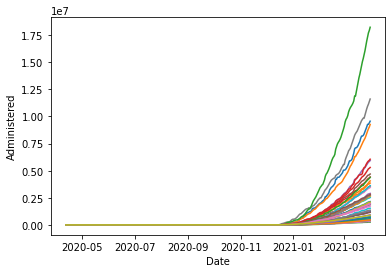

In [310]:
ax1 = plot_states_over_time(combined_covid_data, states_only, 'Administered', time_col="Date")
ax1.remove()

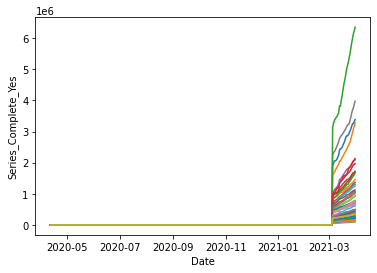

In [311]:
ax2 = plot_states_over_time(combined_covid_data, states_only, 'Series_Complete_Yes', time_col="Date")
ax2.remove()

In [302]:
combined_data = combined_covid_data.merge(all_weather.drop(columns=['Date']), how="inner", 
                                   left_on = ['Year','Month','State'], right_on=['Year','Month','State'])
combined_data.head()
combined_data[['Date', 'Month', 'State',
               'Monthly Avg Temp (F)', 
               'Monthly Temp (F)']].sample(5)

,Date,Month,State,Monthly Avg Temp (F),Monthly Temp (F)
5308,2021-03-30,3,Kentucky,46.755000,50.525000
15963,2020-05-15,5,West Virginia,61.930000,57.933333
13599,2020-09-06,9,South Dakota,61.794444,60.266667
8096,2021-02-14,2,Missouri,35.366667,25.166667
2045,2021-01-12,1,Connecticut,26.786667,28.966667


In [303]:
combined_data.head()

,Date,State,Total Pop,Confirmed_diff,Confirmed_rate,Confirmed_rate_diff,Deaths_diff,Deaths_rate,Deaths_rate_diff,Recovered_rate,...,Active_diff,Active_rate_diff,Active_rate,Case_Fatality_Ratio,Administered,Series_Complete_Yes,Month,Year,Monthly Temp (F),Monthly Avg Temp (F)
0,2020-04-12,Alabama,4903185,NaN,0.000748,NaN,NaN,0.000019,NaN,NaN,...,NaN,NaN,0.000708,2.610160,NaN,NaN,4,2020,61.55,63.096875
1,2020-04-13,Alabama,4903185,203.0,0.000789,0.000041,6.0,0.000020,1.223694e-06,NaN,...,165.0,0.000034,0.000741,2.651312,NaN,NaN,4,2020,61.55,63.096875
2,2020-04-14,Alabama,4903185,171.0,0.000824,0.000035,15.0,0.000023,3.059236e-06,NaN,...,204.0,0.000042,0.000783,2.883886,NaN,NaN,4,2020,61.55,63.096875
3,2020-04-15,Alabama,4903185,266.0,0.000878,0.000054,4.0,0.000024,8.157963e-07,NaN,...,118.0,0.000024,0.000807,2.895706,NaN,NaN,4,2020,61.55,63.096875
4,2020-04-16,Alabama,4903185,158.0,0.000911,0.000032,15.0,0.000027,3.059236e-06,NaN,...,255.0,0.000052,0.000859,3.060990,NaN,NaN,4,2020,61.55,63.096875


In [203]:
combined_data.columns

Index(['Date', 'State', 'Administered', 'Series_Complete_Yes', 'Total Pop',
       'Confirmed_diff', 'Confirmed_rate', 'Confirmed_rate_diff',
       'Deaths_diff', 'Deaths_rate', 'Deaths_rate_diff', 'Recovered_rate',
       'Recovered_diff', 'Recovered_rate_diff', 'Active_diff',
       'Active_rate_diff', 'Active_rate', 'Case_Fatality_Ratio', 'Month',
       'Year', 'Monthly Avg Temperature (F)', 'Monthly Temperature (F)'],
      dtype='object')

In [204]:
combined_data[combined_data['State']=='California']['Monthly Temperature (F)'].nunique()

4

## Exploratory Data Analysis

Our goal is create models predicting COVID cases, either total or by death. To start, let's explore any relationships between our features and these outcomes. 

Outcome features:
* `Confirmed_diff`/`Confirmed_rate_diff` - number of confirmed cases in the state for that day as a raw count and proportion of total population 
* `Deaths_diff`/`Deaths_rate_diff` - number of COVID deaths in the state for that day as a raw count and proportion of total population 

In [182]:
daily_case_rate_by_temps = combined_data[['Monthly Avg Temperature (F)', 'Monthly Temperature (F)','Confirmed_rate_diff']]
#combined_data.groupby(['Monthly Avg Temperature (F)', 'Monthly Temperature (F)']).agg(np.mean)['Confirmed_rate_diff'].reset_index()
daily_case_rate_by_temps.head()

,Monthly Avg Temperature (F),Monthly Temperature (F),Confirmed_rate_diff
0,51.677778,53.9,0.000099
1,51.677778,53.9,0.000031
2,51.677778,53.9,0.000223
3,51.677778,53.9,0.000000
4,51.677778,53.9,0.000000


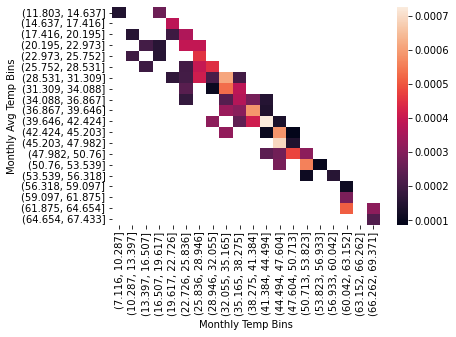

In [187]:
daily_case_rate_by_temps = combined_data[['Monthly Avg Temperature (F)', 'Monthly Temperature (F)','Confirmed_rate_diff']]
daily_case_rate_by_temps.loc[:,'Monthly Avg Temp Bins'] = pd.cut(daily_case_rate_by_temps['Monthly Avg Temperature (F)'], bins=20)
daily_case_rate_by_temps.loc[:,'Monthly Temp Bins'] = pd.cut(daily_case_rate_by_temps['Monthly Temperature (F)'], bins=20)
daily_case_rate_by_temps = daily_case_rate_by_temps.groupby(['Monthly Avg Temp Bins', 'Monthly Temp Bins']).agg(np.mean)['Confirmed_rate_diff'].reset_index()
daily_case_rate_by_temps.head()
sns.heatmap(daily_case_rate_by_temps.pivot('Monthly Avg Temp Bins', 'Monthly Temp Bins', 'Confirmed_rate_diff'));

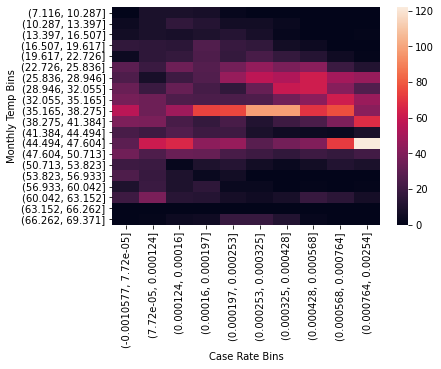

In [179]:
daily_case_rate_by_temps = combined_data[['Monthly Avg Temperature (F)', 'Monthly Temperature (F)','Confirmed_rate_diff']]
daily_case_rate_by_temps.loc[:,'Monthly Temp Bins'] = pd.cut(daily_case_rate_by_temps['Monthly Temperature (F)'], bins=20)
daily_case_rate_by_temps.loc[:,'Case Rate Bins'] = pd.qcut(daily_case_rate_by_temps['Confirmed_rate_diff'], q=10)#, bins=20)
daily_case_rate_by_temps.head()
counts_by_temp_and_cases = daily_case_rate_by_temps.groupby(['Monthly Temp Bins','Case Rate Bins']).count()['Monthly Avg Temperature (F)'].reset_index().rename(columns={"Monthly Avg Temperature (F)":"Counts"})
sns.heatmap(counts_by_temp_and_cases.pivot('Monthly Temp Bins','Case Rate Bins', 'Counts'));

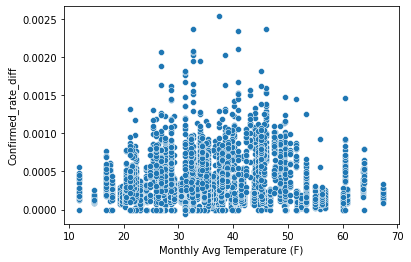

In [134]:
sns.scatterplot(y='Confirmed_rate_diff', x='Monthly Avg Temperature (F)', data=combined_data);

Expectation: hotter or colder months will lead to high case rates. Not exactly showing in the data... 

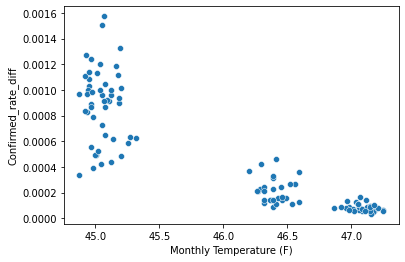

In [196]:
#https://stackoverflow.com/questions/64553046/seaborn-scatterplot-size-and-jitter
def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)
ca_data = combined_data[combined_data['State']=='California']
jittered_monthly_temps = jitter(ca_data['Monthly Temperature (F)'], 0.55)
sns.scatterplot(y=ca_data['Confirmed_rate_diff'], x=jittered_monthly_temps);

In [198]:
ca_data['Monthly Temperature (F)'].nunique()

4

## Modeling